In [1]:
plot_output_dir = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Output Plots/"
data_output_dir = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Output Data/"

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick
import os

In [3]:
local_path = os.getcwd()+"/"

In [4]:
bl_path = "/Users/vibhav/Downloads/Bloomberg 10 Year Govt Bond TR Index (13).xlsx"


In [5]:
def concatter(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[:last_date_in_local][:-1], local_df])
    return final_df

In [6]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True, dayfirst=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:], local_df])
    return final_df

In [7]:
lmex = concatter2("lmex.csv", 28, 29, "PX_LAST.9", "lmex")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [8]:
lmex = lmex[::-1]

In [9]:
lmex

,lmex
Date,
2017-03-31,2858.7
2017-03-24,2846.2
2017-03-17,2881.8
2017-02-17,2872.5
2017-02-24,2863.3
...,...
2022-02-25,4840.4
2022-03-04,5355.8
2022-03-11,5329.0


In [10]:
lmex.pct_change()

,lmex
Date,
2017-03-31,NaN
2017-03-24,-0.004373
2017-03-17,0.012508
2017-02-17,-0.003227
2017-02-24,-0.003203
...,...
2022-02-25,0.005797
2022-03-04,0.106479
2022-03-11,-0.005004


In [11]:
lmex.tail()

,lmex
Date,
2022-02-25,4840.4
2022-03-04,5355.8
2022-03-11,5329.0
2022-03-18,5143.9
2022-03-25,5212.6


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/4006959409.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


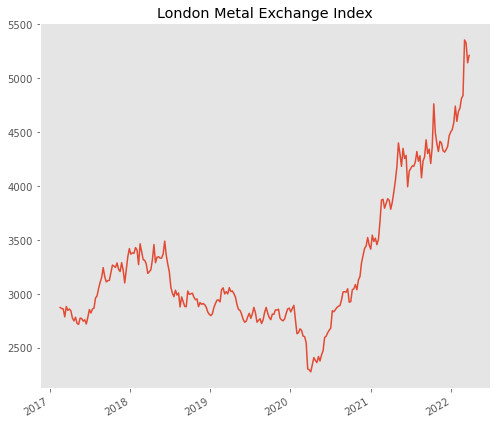

In [12]:
lmex["lmex"].plot(figsize=(7,6), x_compat=True)


plt.title('London Metal Exchange Index')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig(plot_output_dir+'lmex.png', dpi=300, bbox_inches='tight')


In [13]:
lmex.to_csv("lmex.csv")

In [14]:
copper = concatter2("copper.csv", 31, 32, "PX_LAST.10", "Copper")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [15]:
copper

,Copper
Date,
2022-03-25,4.6860
2022-03-18,4.7305
2022-03-11,4.6160
2022-03-04,4.9290
2022-02-25,4.4720
...,...
2016-11-25,2.6680
2016-11-18,2.4675
2016-11-11,2.5090


In [16]:
# copper.iloc[0] = copper.iloc[0]*100

In [17]:
copper.head()

,Copper
Date,
2022-03-25,4.6860
2022-03-18,4.7305
2022-03-11,4.6160
2022-03-04,4.9290
2022-02-25,4.4720


In [18]:
copper[::-1].pct_change()*100

,Copper
Date,
2016-10-28,NaN
2016-11-04,3.259631
2016-11-11,10.772627
2016-11-18,-1.654045
2016-11-25,8.125633
...,...
2022-02-25,-1.051001
2022-03-04,10.219141
2022-03-11,-6.350172


In [19]:
# copper = copper/100

In [20]:
copper[::-1]

,Copper
Date,
2016-10-28,2.1935
2016-11-04,2.2650
2016-11-11,2.5090
2016-11-18,2.4675
2016-11-25,2.6680
...,...
2022-02-25,4.4720
2022-03-04,4.9290
2022-03-11,4.6160


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/1825054869.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


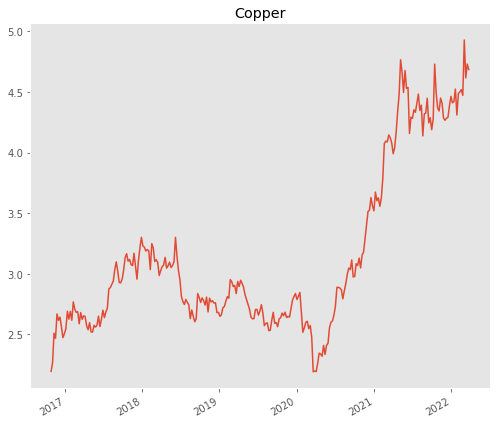

In [21]:
copper["Copper"].plot(figsize=(7,6), x_compat=True)


plt.title('Copper')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig(plot_output_dir+'copper.png', dpi=300, bbox_inches='tight')


In [22]:
copper.to_csv("copper.csv")

In [23]:
al = concatter2("al.csv", 35, 36, "PX_LAST.11", "Aluminium")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [24]:
al[::-1]

,Aluminium
Date,
2016-10-28,1718.75
2016-11-04,1717.25
2016-11-11,1743.50
2016-11-18,1697.75
2016-11-25,1758.75
...,...
2022-02-25,3366.50
2022-03-04,3875.50
2022-03-11,3459.50


In [25]:
al[::-1].pct_change()*100

,Aluminium
Date,
2016-10-28,NaN
2016-11-04,-0.087273
2016-11-11,1.528607
2016-11-18,-2.624032
2016-11-25,3.592991
...,...
2022-02-25,2.793893
2022-03-04,15.119560
2022-03-11,-10.734099


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/291302504.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


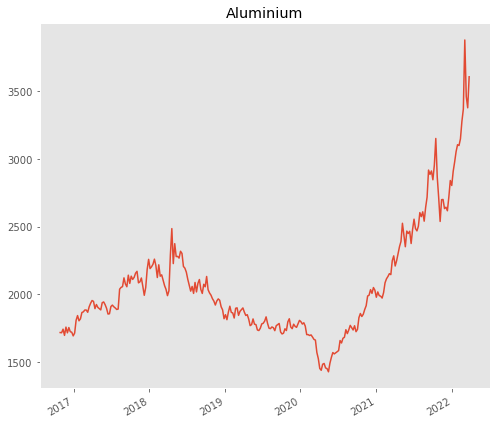

In [26]:
al["Aluminium"].plot(figsize=(7,6), x_compat=True)


plt.title('Aluminium')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig(plot_output_dir+'al.png', dpi=300, bbox_inches='tight')


In [27]:
al.to_csv("al.csv")

In [28]:
food = concatter2("food.csv", 38, 39, "PX_LAST.12", "food")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [29]:
food.dropna(inplace=True)

In [30]:
food

,food
Date,
2022-02-28,146.780
2022-01-31,139.821
2021-12-31,134.798
2021-11-30,132.567
2021-10-31,131.119
...,...
2017-02-28,107.023
2017-01-31,106.537
2016-12-31,102.327


In [31]:
food[::-1].pct_change()*100

,food
Date,
2016-10-31,NaN
2016-11-30,0.549467
2016-12-31,1.117633
2017-01-31,4.114261
2017-02-28,0.456180
...,...
2021-10-31,1.622941
2021-11-30,1.104340
2021-12-31,1.682923


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_32600/2917838141.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


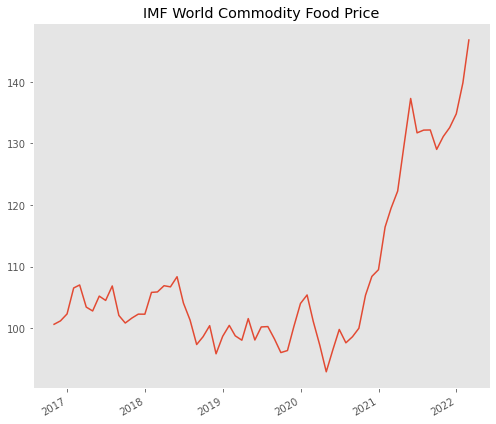

In [32]:
food["food"].plot(figsize=(7,6), x_compat=True)


plt.title('IMF World Commodity Food Price')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig(plot_output_dir+'food.png', dpi=300, bbox_inches='tight')


In [33]:
food.to_csv("food.csv")